In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data=pd.read_csv("Salary_Data.csv")

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Education level contains values with same meaning

In [133]:
data["Education Level"].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [134]:
data['Education Level'] = data['Education Level'].str.replace("Master's Degree", "Master's")
data['Education Level'] = data['Education Level'].str.replace("Bachelor's Degree", "Bachelor's")
data["Education Level"].value_counts()

Bachelor's     3023
Master's       1861
PhD            1368
High School     448
phD               1
Name: Education Level, dtype: int64

In [106]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Year of Experience is not significance for this segment task,

In [138]:
data=data.drop("Years of Experience",axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

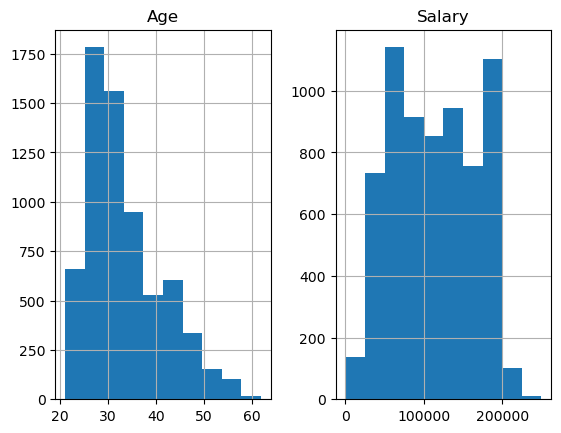

In [139]:
data.hist()

As null values are very less, so instead of impute the values i remove the values

In [140]:
data=data.dropna()
data = data.reset_index(drop=True)

In [141]:
data['Job Title'].nunique()

191

In [137]:
data.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


In [142]:
numeric_val=[i for i in data.columns if (data[i].dtype!='object')]

cat_var=[i for i in data.columns if (data[i].dtype=='object')]
cat_var.remove("Job Title")


Fature engineering

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
data[numeric_val]=sc.fit_transform(data[numeric_val])

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
one_hot=OneHotEncoder()

In [115]:
encoded=one_hot.fit_transform(data[cat_var])

In [118]:
genencode = pd.get_dummies(data['Gender'])

In [19]:
encoded.toarray().shape

(6698, 10)

In [125]:
genencode

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
6693,1,0,0
6694,0,1,0
6695,1,0,0
6696,0,1,0


combining features Age,Salary, Educationlevel, gender

In [44]:
import numpy as np

numeric_array = np.array(data[numeric_val])
encoded_arr= encoded.toarray()
ndata=np.concatenate([numeric_array,encoded_arr],axis=1)


In [45]:
ndata[0,]

array([-0.2131288 , -0.47984928,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

Combining only Salary and Age data

In [154]:
from sklearn.cluster import KMeans
x = np.array(data[['Salary', 'Age']])

Performing k-means with salary and age data

In [161]:
kmeans = KMeans(n_clusters=3,random_state=0, n_init=20)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=20, random_state=0)

In [162]:
labels=kmeans.labels_

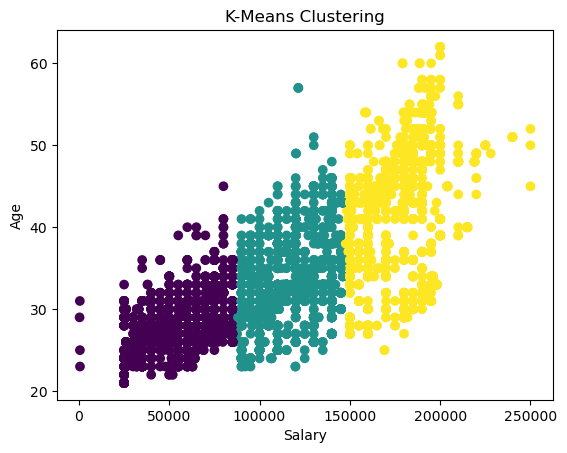

In [157]:
plt.scatter(data['Salary'],data['Age'], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()



In [163]:
cluster_assignments = labels

# Count the number of data points in each cluster
unique_clusters, cluster_counts = np.unique(cluster_assignments, return_counts=True)

# Print the cluster assignments and the number of data points in each cluster
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 2367 data points
Cluster 1: 2186 data points
Cluster 2: 2145 data points


silhouette_score

In [158]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, kmeans.labels_)
print(silhouette_avg)

0.6039239291849261


K-means Clustering using Features Age,Salary, Gender, Education level(Normalized values)

In [164]:
kmeans = KMeans(n_clusters=3,random_state=0, n_init=20)
kmeans.fit(ndata)

KMeans(n_clusters=3, n_init=20, random_state=0)

In [165]:
label1=kmeans.labels_

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ndata)

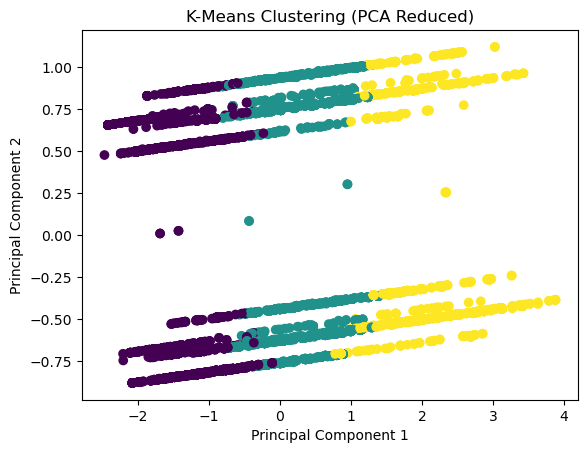

In [167]:


# Visualize the clustered data in the reduced space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [168]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(ndata, kmeans.labels_)
print(silhouette_avg)

0.2752429226827771


In [170]:
cluster_assignments = kmeans.labels_

# Count the number of data points in each cluster
unique_clusters, cluster_counts = np.unique(cluster_assignments, return_counts=True)

# Print the cluster assignments and the number of data points in each cluster
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 2723 data points
Cluster 1: 2632 data points
Cluster 2: 1343 data points


In [171]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(ndata, kmeans.labels_)
print(silhouette_avg)

0.2752429226827771


In [172]:
# kmeans.labels_
cluster_centers=kmeans.cluster_centers_

It tells most important features used for clustering

In [174]:
cluster_center_df = pd.DataFrame(cluster_centers)

# Display cluster center values
print("Cluster Centers:")
print(cluster_center_df)

# To identify the most important features for each cluster, you can sort the columns
# of the cluster_center_df by their values within each cluster
for cluster_num in range(3):
    print(f"\nCluster {cluster_num + 1} - Most Important Features:")
    sorted_features = cluster_center_df.iloc[cluster_num].sort_values(ascending=False)
    print(sorted_features)

Cluster Centers:
         0         1         2         3         4         5         6   \
0 -0.773259 -1.008365  0.486228  0.512303  0.001469  0.084833  0.633125   
1 -0.026732  0.434997  0.481763  0.516717  0.001520  0.190729  0.151976   
2  1.620211  1.192008  0.313477  0.682055  0.004468  0.017126  0.104989   

         7         8         9         10            11  
0  0.160118  0.009548  0.096585  0.015791  6.234162e-19  
1  0.000760  0.082827  0.384878  0.188450  3.799392e-04  
2  0.007446  0.032762  0.220402  0.617275  5.421011e-19  

Cluster 1 - Most Important Features:
6     6.331252e-01
3     5.123026e-01
2     4.862284e-01
7     1.601175e-01
9     9.658465e-02
5     8.483290e-02
10    1.579141e-02
8     9.548292e-03
4     1.468968e-03
11    6.234162e-19
0    -7.732595e-01
1    -1.008365e+00
Name: 0, dtype: float64

Cluster 2 - Most Important Features:
3     0.516717
2     0.481763
1     0.434997
9     0.384878
5     0.190729
10    0.188450
6     0.151976
8     0.082827
4 

In [175]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ndata)

In [176]:
import plotly.express as px
from plotly.offline import iplot
# iplot(figure)

In [177]:
x = reduced_data[:, 0]
y = reduced_data[:, 1]
z = reduced_data[:, 2]

df = pd.DataFrame({'X': x, 'Y': y, 'Z': z, 'Cluster': kmeans.labels_})


In [178]:

figure = px.scatter_3d(df,
    x='X',
    y='Y',
    z='Z', category_orders={"clusters": ["0", "1", "2"]}, color=kmeans.labels_,text='Cluster',  labels={'X': 'X Label', 'Y': 'Y Label', 'Z': 'Z Label'},)


# Display the figure using iplot
iplot(figure)

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(ndata)




DBSCAN()

In [180]:
label=dbscan.labels_

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ndata)

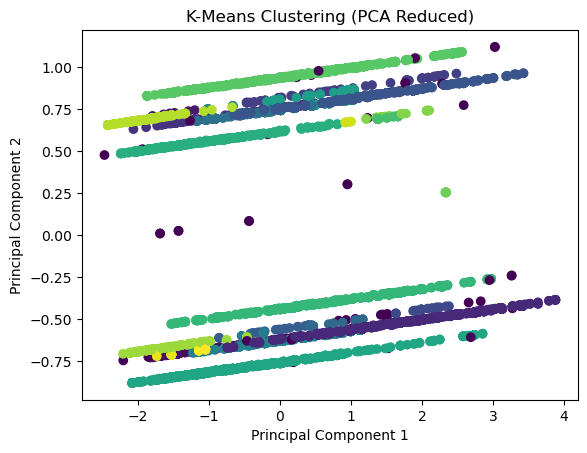

In [182]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=label, cmap='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()